In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("teleChurn500.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
customerID          500 non-null object
gender              500 non-null object
SeniorCitizen       500 non-null int64
Partner             500 non-null object
Dependents          500 non-null object
tenure              500 non-null int64
PhoneService        500 non-null object
MultipleLines       500 non-null object
InternetService     500 non-null object
OnlineSecurity      500 non-null object
OnlineBackup        500 non-null object
DeviceProtection    500 non-null object
TechSupport         500 non-null object
StreamingTV         500 non-null object
StreamingMovies     500 non-null object
Contract            500 non-null object
PaperlessBilling    500 non-null object
PaymentMethod       500 non-null object
MonthlyCharges      500 non-null float64
TotalCharges        500 non-null float64
Churn               500 non-null object
dtypes: float64(2), int64(2), object(17)
memory usage: 

In [5]:
X=df.iloc[:,0:20]
X[0:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [33]:
y=df.iloc[:,20]
y[0:5]

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [7]:
garr=df.gender.unique()
garr

array(['Female', 'Male'], dtype=object)

In [8]:
ptnr=df.Partner.unique()
ptnr

array(['Yes', 'No'], dtype=object)

In [9]:
dep=df.Dependents.unique()
dep

array(['No', 'Yes'], dtype=object)

In [10]:
psar=df.PhoneService.unique()
psar

array(['No', 'Yes'], dtype=object)

In [11]:
mul=df.MultipleLines.unique()
mul

array(['No phone service', 'No', 'Yes'], dtype=object)

In [12]:
iser=df.InternetService.unique()
iser

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [13]:
osec=df.OnlineSecurity.unique()
osec

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())

['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [15]:
oba=df.OnlineBackup.unique()
oba

array(['Yes', 'No', 'No internet service'], dtype=object)

In [16]:
dpr=df.DeviceProtection.unique()
dpr

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
print(df.Contract.unique())
print(df.PaperlessBilling.unique())
print(df.PaymentMethod.unique())

['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
cnt=df.Contract.unique()
pbil=df.PaperlessBilling.unique()
pmet=df.PaymentMethod.unique()

In [19]:
X[0:2]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [20]:
from sklearn import preprocessing
le_garr= preprocessing.LabelEncoder()
le_garr.fit(garr)
X.iloc[:,1] = le_garr.transform(X.iloc[:,1]) 

le_dep= preprocessing.LabelEncoder()
le_dep.fit(dep)
X.iloc[:,4] = le_dep.transform(X.iloc[:,4]) 


le_psar= preprocessing.LabelEncoder()
le_psar.fit(psar)
X.iloc[:,6] = le_psar.transform(X.iloc[:,6]) 

le_mul= preprocessing.LabelEncoder()
le_mul.fit(mul)
X.iloc[:,7] = le_mul.transform(X.iloc[:,7]) 

le_iser= preprocessing.LabelEncoder()
le_iser.fit(iser)
X.iloc[:,8] = le_iser.transform(X.iloc[:,8]) 

le_osec= preprocessing.LabelEncoder()
le_osec.fit(osec)
X.iloc[:,9] = le_osec.transform(X.iloc[:,9]) 

le_oba= preprocessing.LabelEncoder()
le_oba.fit(oba)
X.iloc[:,10] = le_oba.transform(X.iloc[:,10]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X.iloc[:,11]= le_dpr.transform(X.iloc[:,11]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X.iloc[:,12] = le_dpr.transform(X.iloc[:,12]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X.iloc[:,13] = le_dpr.transform(X.iloc[:,13]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X.iloc[:,14] = le_dpr.transform(X.iloc[:,14]) 



In [21]:
le_ptnr= preprocessing.LabelEncoder()
le_ptnr.fit(X.Partner.unique())
X.iloc[:,3] = le_ptnr.transform(X.iloc[:,3]) 

In [22]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65


In [23]:
le_cnt= preprocessing.LabelEncoder()
le_cnt.fit(cnt)
X.iloc[:,15] = le_cnt.transform(X.iloc[:,15]) 

le_pbil= preprocessing.LabelEncoder()
le_pbil.fit(pbil)
X.iloc[:,16] = le_pbil.transform(X.iloc[:,16]) 

le_pmet= preprocessing.LabelEncoder()
le_pmet.fit(pmet)
X.iloc[:,17] = le_pmet.transform(X.iloc[:,17]) 

In [24]:
le_cusid= preprocessing.LabelEncoder()
le_cusid.fit(X.customerID.unique())
X.iloc[:,0]= le_cusid.transform(X.iloc[:,0]) 


In [25]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,390,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,272,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,171,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,402,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,465,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [26]:
X.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.484000,0.168000,0.484000,0.312000,31.454000,0.890000,0.902000,0.838000,0.764000,0.960000,0.876000,0.784000,0.976000,1.032000,0.668000,0.602000,1.554000,65.973900,2220.367940
std,144.481833,0.500244,0.374241,0.500244,0.463774,24.415489,0.313203,0.939234,0.721663,0.868223,0.898897,0.891186,0.873424,0.899468,0.899218,0.831359,0.489976,1.086944,29.554493,2197.608532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.950000,19.150000
25%,124.750000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.225000,421.700000
50%,249.500000,0.000000,0.000000,0.000000,0.000000,27.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,71.525000,1363.875000
75%,374.250000,1.000000,0.000000,1.000000,1.000000,52.250000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.937500,3569.837500
max,499.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,116.050000,8468.200000


In [27]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.9734145 , -0.968496  , -0.44935852,  1.03252879, -0.67341545,
        -1.24857214, -2.84445234,  0.10444485, -1.16236965, -0.88083928,
         1.15813205, -0.98394426, -0.89851555, -1.08617297, -1.14881312,
        -0.80430806,  0.81309874,  0.41073573, -1.22350526, -0.99777177],
       [ 0.15588488,  1.03252879, -0.44935852, -0.968496  , -0.67341545,
         0.1043825 ,  0.35156152, -0.96131896, -1.16236965,  1.42502271,
        -1.06904497,  1.26250382, -0.89851555, -1.08617297, -1.14881312,
         0.39974592, -1.22986292,  1.33166787, -0.30563669, -0.15070896],
       [-0.54386504,  1.03252879, -0.44935852, -0.968496  , -0.67341545,
        -1.20757352,  0.35156152, -0.96131896, -1.16236965,  1.42502271,
         1.15813205, -0.98394426, -0.89851555, -1.08617297, -1.14881312,
        -0.80430806,  0.81309874,  1.33166787, -0.41063272, -0.96210644],
       [ 1.05655311,  1.03252879, -0.44935852, -0.968496  , -0.67341545,
         0.55536738, -2.84445234,  0.10444485, -

In [50]:
#y.unique()
churn=y.unique()


In [51]:
le_churn= preprocessing.LabelEncoder()
le_churn.fit(churn)
y[:] = le_churn.transform(y[:]) 


In [54]:
y=np.asarray(y[:]).astype(int)
y[0:5]

array([0, 0, 1, 0, 1])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 20) (400,)
Test set: (100, 20) (100,)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [58]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59105823, 0.40894177],
       [0.7285222 , 0.2714778 ],
       [0.56374374, 0.43625626],
       [0.49133975, 0.50866025],
       [0.54602445, 0.45397555],
       [0.54288471, 0.45711529],
       [0.41881538, 0.58118462],
       [0.41612682, 0.58387318],
       [0.88331002, 0.11668998],
       [0.77864308, 0.22135692],
       [0.74404452, 0.25595548],
       [0.65689191, 0.34310809],
       [0.48296753, 0.51703247],
       [0.45555472, 0.54444528],
       [0.44479236, 0.55520764],
       [0.43116987, 0.56883013],
       [0.45674266, 0.54325734],
       [0.68421439, 0.31578561],
       [0.82113535, 0.17886465],
       [0.77573533, 0.22426467],
       [0.77245235, 0.22754765],
       [0.61912271, 0.38087729],
       [0.79909535, 0.20090465],
       [0.63875973, 0.36124027],
       [0.33646828, 0.66353172],
       [0.78839048, 0.21160952],
       [0.58585571, 0.41414429],
       [0.57563675, 0.42436325],
       [0.78980529, 0.21019471],
       [0.41769602, 0.58230398],
       [0.

In [59]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.73

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[17  9]
 [18 56]]


Confusion matrix, without normalization
[[17  9]
 [18 56]]


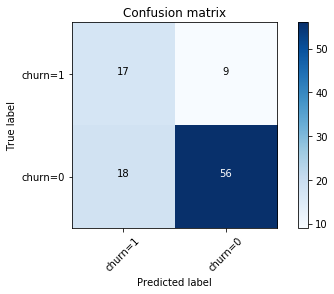

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [62]:
print (classification_report(y_test, yhat))


             precision    recall  f1-score   support

          0       0.86      0.76      0.81        74
          1       0.49      0.65      0.56        26

avg / total       0.76      0.73      0.74       100



In [63]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5179450567314289